# **Laboratorul 9 PMP**

In [15]:
!pip install pymc arviz
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

## **Subpunctul a)**

Model pentru Y = 0, θ = 0.2
Model pentru Y = 0, θ = 0.5
Model pentru Y = 5, θ = 0.2
Model pentru Y = 5, θ = 0.5
Model pentru Y = 10, θ = 0.2
Model pentru Y = 10, θ = 0.5


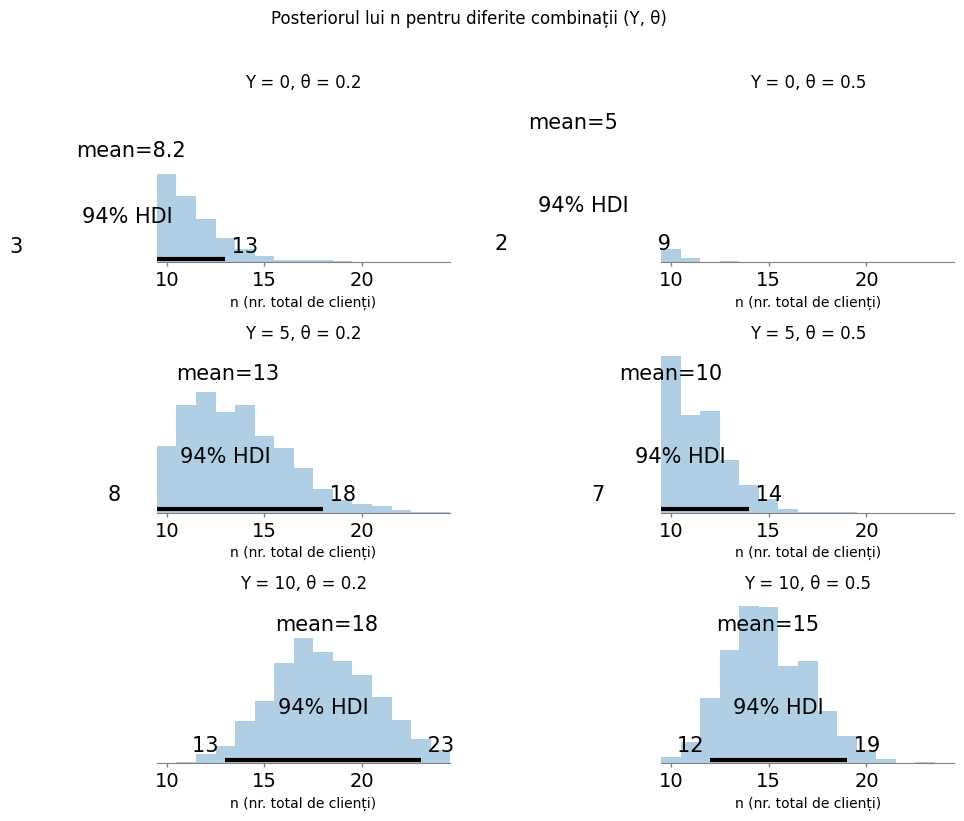

In [16]:
lambda_prior = 10.0
thetas = [0.2, 0.5]
ys = [0, 5, 10]

rows = len(ys)
cols = len(thetas)

fig, axes = plt.subplots(rows, cols, figsize=(10, 8), sharex=True, sharey=True)

for i, y in enumerate(ys):
    for j, theta in enumerate(thetas):
        ax = axes[i, j]
        print(f"Model pentru Y = {y}, θ = {theta}")

        with pm.Model() as model:
            n = pm.Poisson("n", mu=lambda_prior)
            Y = pm.Binomial("Y", n=n, p=theta, observed=y)

            trace = pm.sample(
                draws=2000,
                tune=2000,
                chains=2,
                cores=1,
                random_seed=2025,
                progressbar=False,
            )

        az.plot_posterior(
            trace,
            var_names=["n"],
            hdi_prob=0.94,
            point_estimate="mean",
            ax=ax,
        )
        ax.set_title(f"Y = {y}, θ = {theta}")
        ax.set_xlabel("n (nr. total de clienți)")

fig.suptitle("Posteriorul lui n pentru diferite combinații (Y, θ)", y=1.02)
plt.tight_layout()
plt.show()


## **Subpunctul c)**

Model predictiv pentru Y = 0, θ = 0.2
Model predictiv pentru Y = 0, θ = 0.5
Model predictiv pentru Y = 5, θ = 0.2
Model predictiv pentru Y = 5, θ = 0.5
Model predictiv pentru Y = 10, θ = 0.2
Model predictiv pentru Y = 10, θ = 0.5


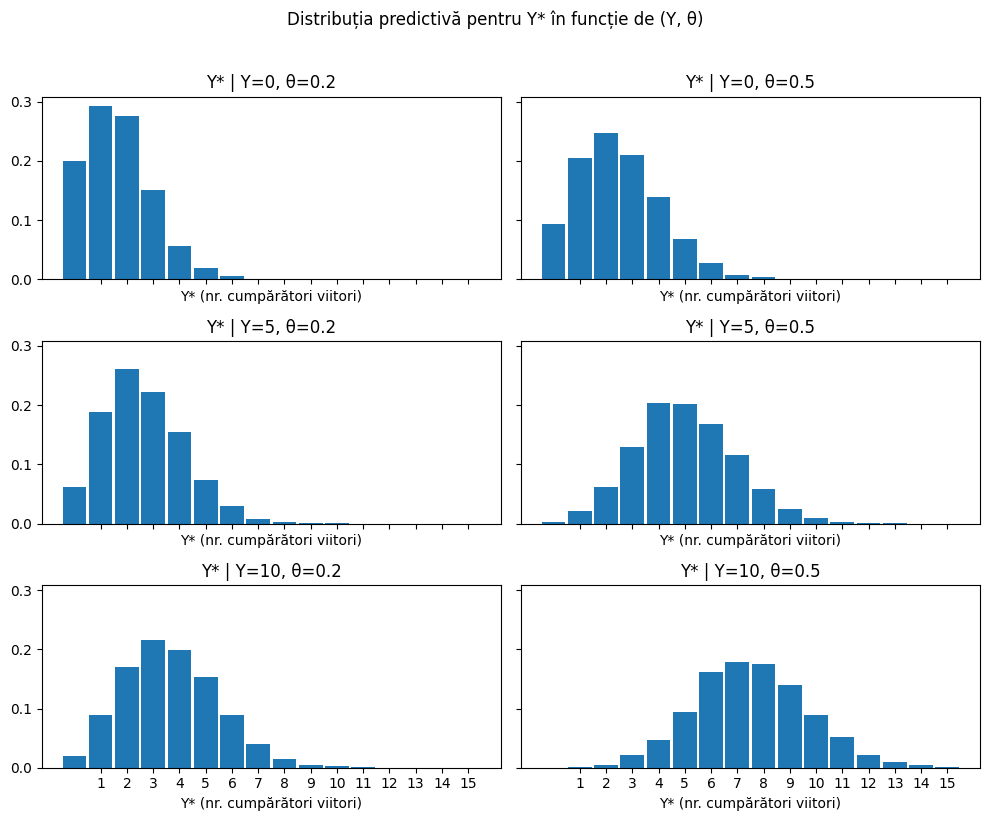

In [17]:
lambda_prior = 10.0
thetas = [0.2, 0.5]
ys = [0, 5, 10]

rows = len(ys)
cols = len(thetas)

fig, axes = plt.subplots(rows, cols, figsize=(10, 8), sharex=True, sharey=True)

for i, y in enumerate(ys):
    for j, theta in enumerate(thetas):
        ax = axes[i, j]
        print(f"Model predictiv pentru Y = {y}, θ = {theta}")

        with pm.Model() as model:
            n = pm.Poisson("n", mu=lambda_prior)
            Y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=y)
            Y_future = pm.Binomial("Y_future", n=n, p=theta)

            idata = pm.sample(
                draws=2000,
                tune=2000,
                chains=2,
                cores=1,
                random_seed=2025,
                progressbar=False,
                return_inferencedata=True,
            )

            idata = pm.sample_posterior_predictive(
                idata,
                var_names=["Y_future"],
                extend_inferencedata=True,
                progressbar=False,
            )

        y_future_samples = idata.posterior_predictive["Y_future"].values.ravel()

        az.plot_dist(y_future_samples, ax=ax)
        ax.set_title(f"Y* | Y={y}, θ={theta}")
        ax.set_xlabel("Y* (nr. cumpărători viitori)")

fig.suptitle("Distribuția predictivă pentru Y* în funcție de (Y, θ)", y=1.02)
plt.tight_layout()
plt.show()
